# Dimensionality Reduction Techinques

[Prashant Brahmbhatt](https://www.github.com/hashbanger)

___

### Imports

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
df = pd.read_csv('train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


___

## Missing Value Ratio

In this approach we first calculate the density of missing values and fill them or drop them depending on the threshold of missing values percentage that we set.

In [230]:
df_1 = df

In [231]:
df_1.isnull().sum()/len(df) * 100

Item_Identifier               0.000000
Item_Weight                  16.734813
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.431659
Outlet_Location_Type          0.014603
Outlet_Type                   0.014603
Item_Outlet_Sales             0.014603
dtype: float64

We can observe that five columns have missing values.  
A logical step now here would be to drop the columns having missing values percentage above 20% and impute the ones having less.

In [232]:
missing_pct = df_1.isnull().sum()/len(df_1) * 100

In [233]:
drop_feat = []
for col in df_1.columns:
    if missing_pct[col] > 20:
        drop_feat.append(col)

In [234]:
df_1 = df_1.drop(drop_feat, axis= 1)
df_1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


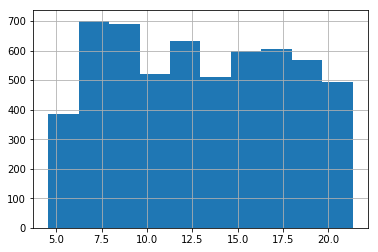

In [235]:
pd.Series.hist(df_1['Item_Weight'])
plt.show()

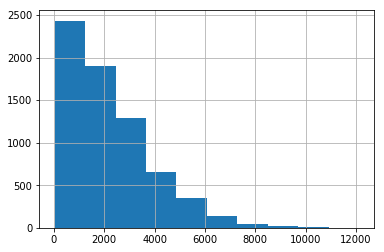

In [236]:
pd.Series.hist(df_1['Item_Outlet_Sales'])
plt.show()

In [237]:
df_1['Item_Weight'].fillna(df_1['Item_Weight'].mean(), inplace = True)
df_1['Item_Outlet_Sales'].fillna(df_1['Item_Outlet_Sales'].median(), inplace = True)
df_1['Outlet_Type'].fillna(df_1['Outlet_Type'].value_counts()[0], inplace = True)  # replacing with most occuring value
df_1['Outlet_Location_Type'].fillna(df_1['Outlet_Location_Type'].value_counts()[0], inplace = True) # replacing with most occuring value

___

## Low Variance Filter

If a feature in our dataset contains a single type of value in all the cells then it would not be useful for either the analysis or the model. Similarly the features which have low variance should be dropped as they provide little to o information to the model.

In [238]:
df_1.isnull().sum()/len(df_1) * 100 # No Null values left

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

As observed the variance of the **Item_Visibility** is very less so we better drop this column.

In [239]:
drop_feat = []
for col in variance_pct.index:
    if variance_pct[col] <= 10:
        drop_feat.append(col)

In [240]:
df_1 = df_1.drop(drop_feat, axis = 1)
df_1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


___

## High Correlation

We should always remove features that are similar to any other feature in the feature set or are highly correlated as they carry similar information and including both causes multicollinearity in the model.  
However, we should keep the features which are highly correalted with the target variable.

In [241]:
df_1.drop(['Item_Outlet_Sales'], axis = 1).corr()

,Item_Weight,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,0.020162,-0.004367
Item_MRP,0.020162,1.000000,0.006037
Outlet_Establishment_Year,-0.004367,0.006037,1.000000


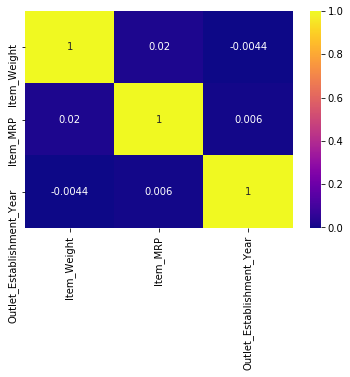

In [242]:
sns.heatmap(df_1.drop(['Item_Outlet_Sales'], axis = 1).corr(), cmap = 'plasma', annot= True)

As evident from the plot as well as the table we don;t have any correlated features.

___

## Random Forest

In [243]:
df_1 = df_1.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1)

In [244]:
from sklearn.ensemble import RandomForestRegressor

In [245]:
df_dummmied = pd.get_dummies(df_1)
df_dummmied.drop('Item_Outlet_Sales', axis = 1, inplace = True)

In [246]:
regressor = RandomForestRegressor(max_depth= 10)


In [247]:
regressor.fit(df_dummmied, df_1['Item_Outlet_Sales'])

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Now we get the top 10 features

In [248]:
importances = regressor.feature_importances_
idx = importances.argsort()[-9:]

In [250]:
importances

array([2.54577122e-02, 5.38095970e-01, 3.80709682e-02, 2.00811638e-03,
       3.41297468e-03, 2.91411211e-03, 1.71819345e-03, 1.30437356e-03,
       1.58021837e-03, 2.16812835e-03, 1.57623162e-03, 2.21603042e-03,
       3.78178335e-03, 2.62647684e-03, 6.10961998e-03, 1.77351990e-03,
       2.11294788e-03, 3.59896123e-03, 1.46198933e-03, 4.35015985e-04,
       8.02627942e-04, 3.73148805e-03, 2.45377138e-03, 2.43562712e-03,
       0.00000000e+00, 1.20177283e-03, 1.36303441e-03, 1.76734887e-03,
       0.00000000e+00, 2.69792510e-01, 2.18218855e-03, 9.44759091e-04,
       7.09015278e-02])

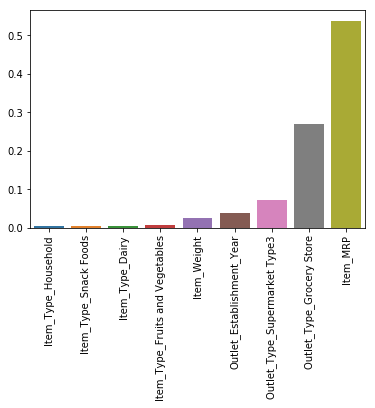

In [271]:
fig = sns.barplot(x = df_dummmied.T.iloc[idx].index, y = importances[idx])
# plt.xticks(rotation = 'vertical')
fig.set_xticklabels(fig.get_xticklabels(), rotation = 90)
plt.show()

In [259]:
idx

array([17, 21, 12, 14,  0,  2, 32, 29,  1], dtype=int64)

In [211]:
importances

array([6.86952912e-07, 1.07096895e-05, 6.69866396e-07, 9.99950964e-01,
       1.57825255e-09, 3.14796907e-06, 1.48621819e-06, 2.88901654e-09,
       2.20344566e-09, 6.82731907e-08, 3.26853829e-08, 3.08237616e-08,
       1.32401961e-06, 1.22581116e-05, 6.88237251e-08, 8.72578968e-08,
       2.20633560e-10, 1.94948035e-08, 1.87705478e-08, 1.76451686e-08,
       8.04156891e-09, 5.42758535e-09, 2.59500757e-07, 2.00497782e-07,
       8.48706186e-10, 0.00000000e+00, 2.64208979e-07, 1.79244394e-07,
       3.83792377e-07, 0.00000000e+00, 2.28577820e-11, 1.67072776e-05,
       3.94694862e-09, 3.89721923e-07])

Index(['Item_Type_Household', 'Item_Type_Snack Foods', 'Item_Type_Dairy',
       'Item_Type_Fruits and Vegetables', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Type_Supermarket Type3',
       'Outlet_Type_Grocery Store', 'Item_MRP'],
      dtype='object')